## Data from World Happiness Report

The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors.

In this notebook we will explore the happiness of different countries and the features associated.
The datasets that we will use are available in *Data*: **happiness2020.pkl** and **countries_info.csv**.

Although the features are self-explanatory, here a summary: 

**happiness2020.pkl**
* country: *Name of the country*
* happiness_score: *Happiness score*
* social_support: *Social support (mitigation the effects of inequality)*
* healthy_life_expectancy: *Healthy Life Expectancy*
* freedom_of_choices: *Freedom to make life choices*
* generosity: *Generosity (charity, volunteers)*
* perception_of_corruption: *Corruption Perception*
* world_region: *Area of the world of the country*

**countries_info.csv**
* country_name: *Name of the country*
* area: *Area in sq mi*
* population: *Number of people*
* literacy: *Literacy percentage*

In [1]:
!head Data/countries_info.csv

country_name,area,population,literacy
afghanistan,647500,31056997,"36,0"
albania,28748,3581655,"86,5"
algeria,2381740,32930091,"70,0"
argentina,2766890,39921833,"97,1"
armenia,29800,2976372,"98,6"
australia,7686850,20264082,"100,0"
austria,83870,8192880,"98,0"
azerbaijan,86600,7961619,"97,0"
bahrain,665,698585,"89,1"


In [2]:
import pandas as pd
%matplotlib inline

DATA_FOLDER = 'Data/'

HAPPINESS_DATASET = DATA_FOLDER+"happiness2020.csv"
COUNTRIES_DATASET = DATA_FOLDER+"countries_info.csv"

## Task 1: Load the data

Load the 2 datasets in Pandas dataframes (called *happiness* and *countries*), and show the first rows.


**Hint**: Use the correct reader and verify the data has the expected format.

In [3]:
happiness = pd.read_pickle(HAPPINESS_DATASET)
happiness['country'] = happiness.country.str.lower()
happiness.head()

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
0,afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia
1,albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe
2,algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa
3,argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean
4,armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States


In [4]:
happiness.shape

(135, 8)

In [5]:
countries = pd.read_csv(COUNTRIES_DATASET)
countries.rename(columns={'country_name': 'country'}, inplace=True)
countries['literacy'] = countries['literacy'].str.replace(',', '.').astype(float)
countries.head()

,country,area,population,literacy
0,afghanistan,647500,31056997,36.0
1,albania,28748,3581655,86.5
2,algeria,2381740,32930091,70.0
3,argentina,2766890,39921833,97.1
4,armenia,29800,2976372,98.6


In [6]:
countries.shape

(135, 4)

## Task 2: Let's merge the data

Create a dataframe called *country_features* by merging *happiness* and *countries*. A row of this dataframe must describe all the features that we have about a country.

**Hint**: Verify to have all the rows in the final dataframe

In [7]:
country_features = pd.merge(happiness, countries, on='country')
country_features.head()

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy
0,afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,647500,31056997,36.0
1,albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,28748,3581655,86.5
2,algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,2381740,32930091,70.0
3,argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,2766890,39921833,97.1
4,armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,29800,2976372,98.6


In [8]:
country_features.shape

(135, 11)

## Task 3: Where do people are happier?

Print the top 10 countries based on their happiness score (high is better).

In [9]:
country_features.sort_values(
    by='happiness_score', ascending=False)[['country', 'happiness_score']].head(10)

,country,happiness_score
38,finland,7.8087
31,denmark,7.6456
115,switzerland,7.5599
50,iceland,7.5045
92,norway,7.4880
87,netherlands,7.4489
114,sweden,7.3535
88,new zealand,7.2996
6,austria,7.2942
72,luxembourg,7.2375


We are interested to know in what world region the people are happier. 

Create and print a dataframe with the (1) average happiness score and (2) the number of contries for each world region.
Sort the result to show the happiness ranking.

In [10]:
regions_avg = country_features[['world_region', 'happiness_score']].groupby(
    'world_region').mean().add_prefix('avg_').sort_values(
        by='avg_happiness_score', ascending=False)
regions_sum = country_features[['world_region', 'country']].groupby(
    'world_region').count().add_prefix('count_')
regions_happiness = pd.merge(regions_avg, regions_sum, on='world_region')
regions_happiness

,avg_happiness_score,count_country
world_region,,
North America and ANZ,7.173525,4
Western Europe,6.967405,20
Latin America and Caribbean,5.971280,20
Central and Eastern Europe,5.891393,14
Southeast Asia,5.517788,8
East Asia,5.483633,3
Commonwealth of Independent States,5.358342,12
Middle East and North Africa,5.269306,16
Sub-Saharan Africa,4.393856,32


The first region has only a few countries! What are them and what is their score?

In [11]:
best_region = regions_happiness.iloc[0].name
best_region

'North America and ANZ'

In [12]:
country_features[country_features['world_region'] == best_region][
    ['country', 'happiness_score']].sort_values(
        by='happiness_score', ascending=False)

,country,happiness_score
88,new zealand,7.2996
21,canada,7.2321
5,australia,7.2228
127,united states,6.9396


## Task 4: How literate is the world?

Print the name of countries with a level of literacy of 100%. 

For each country, print the name and the world region with the format: *{region name} - {country name} ({happiness score})*

In [13]:
literacy_100 = country_features[country_features['literacy'] == 100]
for index, row in literacy_100.iterrows():
    print(f"{row['world_region']} - {row['country']} ({row['happiness_score']})")

North America and ANZ - australia (7.222799778)
Western Europe - denmark (7.645599842)
Western Europe - finland (7.808700085)
Western Europe - luxembourg (7.2375001910000005)
Western Europe - norway (7.487999916000001)


What is the global average?

In [14]:
print('Global average:', country_features.happiness_score.mean())

Global average: 5.525062216659259


Calculate the proportion of countries with a literacy level below 50%. Print the value in percentage, formatted with 2 decimals.

In [15]:
total = len(country_features)
below_50 = len(country_features[country_features['literacy'] < 50])
below_50_percentage = 100 * below_50 / total
print('Proportion of countries with a literacy below 50%:',
      f'{below_50_percentage: .2f}%')

Proportion of countries with a literacy below 50%:  11.85%


Print the raw number and the percentage of world population that is illiterate.

In [16]:
illiterate = (country_features.population * (
    100 - country_features.literacy) / 100).sum()
illiterate_percentage = 100 * illiterate / country_features.population.sum()
print('World population that is illiterate:', illiterate)
print('Percentage:', f'{illiterate_percentage: .2f}%')

World population that is illiterate: 1249372988.1030002
Percentage:  20.33%


## Task 5: Population density

Add to the dataframe a new field called *population_density* computed by dividing *population* by *area*.

In [17]:
country_features['population_density'] = country_features.population / country_features.area
country_features.head()

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy,population_density
0,afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,647500,31056997,36.0,47.964474
1,albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,28748,3581655,86.5,124.587971
2,algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,2381740,32930091,70.0,13.826065
3,argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,2766890,39921833,97.1,14.428413
4,armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,29800,2976372,98.6,99.878255


What is the happiness score of the 3 countries with lowest population density?

In [18]:
country_features.sort_values(by='population_density')[
    ['country', 'happiness_score', 'population_density']].head(3)

,country,happiness_score,population_density
83,mongolia,5.4562,1.810751
5,australia,7.2228,2.636201
14,botswana,3.4789,2.731371


## Task 6: Healty and happy?

Plot in scatter plot the happiness score (x) and healty like expectancy (y).

<AxesSubplot:title={'center':'Healthy life expectancy and happiness score'}, xlabel='Happiness score', ylabel='Healthy life expectancy'>

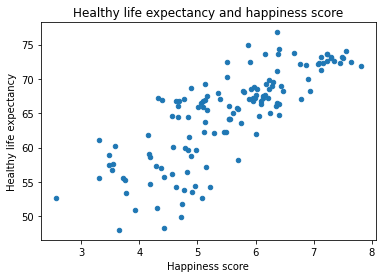

In [19]:
country_features.plot.scatter(
    x='happiness_score', y='healthy_life_expectancy',
    title='Healthy life expectancy and happiness score',
    xlabel='Happiness score', ylabel='Healthy life expectancy')

Feel free to continue the exploration of the dataset! We'll release the solutions next week.

----
Enjoy EPFL and be happy, next year Switzerland must be #1.